# Laboratorio 6
#### 20880 Sebastian Aristondo
#### 20293 Daniel Gonzalez

## Ejercicio 1

Cree un programa en Python (o en el lenguaje de su preferencia) para modelar la distribución de temperatura dentro
de una varilla sólida. Utilice modelado secuencial multiescala, donde combina un modelo macroscópico y un
modelo microscópico. Suponga que la varilla consta de dos materiales diferentes con diferentes conductividades
térmicas.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
class atomo(object):
    
    def __init__(self, masa, left_neighbour, right_neighbour, position):
        self.move= ["left", "right"]
        self.mass = masa
        self.left_neighbour = left_neighbour
        self.right_neighbour = right_neighbour
        self.position = position

    def random_move(self):
        self.position = random.choice(self.move)
    
    def exist_colision(self):
        if self.left_neighbour:
            if self.left_neighbour.position == "right" and self.position == "left":
                return (self.left_neighbour.mass + self.mass)*0.5
        if self.right_neighbour:  
            if self.right_neighbour.position == "left" and self.position == "right":
                return (self.right_neighbour.mass + self.mass)*0.5
        
        return 0


In [13]:
masa_aluminio = 2700
masa_hierro = 7850
tipo_atomo = [masa_aluminio, masa_hierro]
c = (masa_hierro * 450 + masa_aluminio * 900) / (masa_aluminio + masa_hierro)
T = 280
iteraciones_micro = 1000
atomos = 10000
epochs = 100

In [14]:
# Definir el rango deseado para velocidades más frecuentes
velocidad_minima = 0.5
velocidad_maxima = 1.5

# Calcular la media en ese rango
media_en_rango = (velocidad_maxima + velocidad_minima) / 2

# Calcular la tasa (lambda) para la distribución exponencial
lambda_param = 1 / media_en_rango

# Tamaño de la muestra
tamaño_muestra = epochs * iteraciones_micro

# Generar una muestra de velocidades con distribución exponencial
muestras_exponencial = np.random.exponential(scale=1/lambda_param, size=tamaño_muestra)

In [15]:
varilla=[]
m = 0
for i in range(atomos):
    if i % 2 ==0:
        varilla.append(atomo(masa_aluminio, None, None, i))
        m += masa_aluminio
    else:
        varilla.append(atomo(masa_hierro, None, None, i))
        m += masa_hierro
        
for i in range(atomos):
    if i == 0:
        varilla[i].right_neighbour = varilla[i+1]
    elif i == atomos-1:
        varilla[i].left_neighbour = varilla[i-1]
    else:
        varilla[i].left_neighbour = varilla[i-1]
        varilla[i].right_neighbour = varilla[i+1]
    

In [16]:
def calculate_Q(res, velocity):
    return res * velocity

In [17]:
def temperature_differnce(Q):
    return Q / (m * c)

In [18]:
i = 0
temperatura = []
Q = []
for epoch in range(epochs):
    Q_acumulado = 0
    for iteraciones in range(iteraciones_micro):
        velocidad = muestras_exponencial[i]
        i += 1
        for atomo in varilla:
            atomo.random_move()
        for atomo in varilla:
            Q_acumulado += calculate_Q(atomo.exist_colision(), velocidad)
    Q_acumulado /= 2.0
    Q_promedio = Q_acumulado / iteraciones_micro
    T = T + temperature_differnce(Q_promedio)
    Q.append(Q_promedio)
    temperatura.append(T)


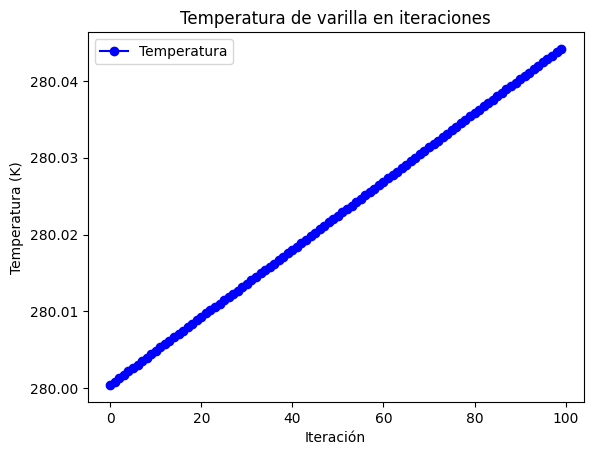

In [25]:
# Crear el gráfico con líneas que unen los puntos para 'temperatura'
plt.plot(range(len(temperatura)), temperatura, color='b', label='Temperatura', marker='o', linestyle='-')

# Añadir etiquetas y título
plt.xlabel('Iteración')
plt.ylabel('Temperatura (K)')
plt.title('Temperatura de varilla en iteraciones')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

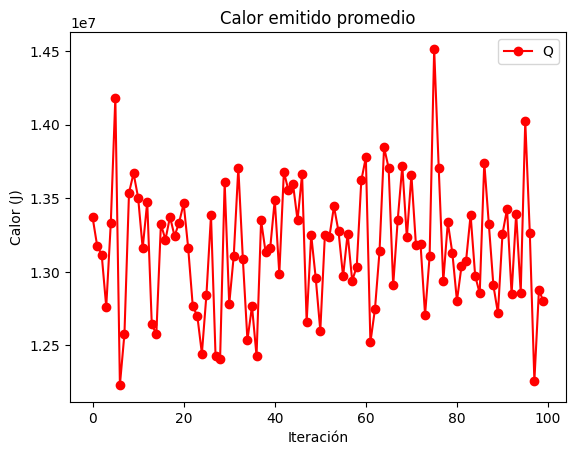

In [24]:
# Crear el gráfico con líneas que unen los puntos para 'Q'
plt.plot(range(len(Q)), Q, color='r', label='Q', marker='o', linestyle='-')

# Añadir etiquetas y título
plt.xlabel('Iteración')
plt.ylabel('Calor (J)')
plt.title('Calor emitido promedio')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

**a. ¿En qué se diferencia el modelo macroscópico del modelo microscópico en este escenario?**


El modelo macroscópico se basa en la temperatura de la varilla en general, mientras que el modelo microscópico se basa en la temperatura de los átomos que componen la varilla. También si diferencia en que el modelos microscópico se basa en agentes y el modelo macroscópico es una formula de energía cinética.

**b. ¿Cuáles son las condiciones de contorno del modelo microscópico y cómo las determina el modelo macroscópico?**


La condición del modelo microscópico se basa en si ocurre una colisión entre los átomos. Todos aquellos átomos que colisionen generar calor. El modelo macroscópico calculara la temperatura de la varilla en base a la suma de las temperaturas de los átomos.

**c. ¿Cómo adaptaría este modelo multiescala si la varilla estuviera compuesta por más de dos materiales diferentes?**


Debido a como realizamos nuestra implementación el modelo se adaptaría muy facil. Al momento de inicializar la calse atomo solo sería de establecer la masa de los n materiales nuevos. La simulación sería exactamente igual ya que solo se estaría afectando la masa de los átomos.

## Ejercicio 2

Implemente un enfoque de modelado multiescala concurrente en Python para simular el flujo de agua a través de
una formación rocosa porosa. Utilice tanto un modelo macroscópico (ley de Darcy) como un modelo microscópico
(ecuaciones de Navier-Stokes) para describir el flujo.